In [ ]:
import numpy as np
from scipy.stats import norm

# Sample Data (Example)
n1, x1 = 5000, 300    # Group A (Control): 5000 users, 300 bookings
n2, x2 = 5000, 360    # Group B (Treatment): 5000 users, 360 bookings

# STEP 1: Sample Proportions (conversion rates)
p1 = x1 / n1          # Conversion rate for Control group
p2 = x2 / n2          # Conversion rate for Treatment group

# STEP 2: Pooled Proportion (p_pool)
# Under the null hypothesis (H₀: p1 = p2), we assume both groups share the same true proportion.
# So, we "pool" all bookings together to estimate that shared conversion rate.
p_pool = (x1 + x2) / (n1 + n2)

# STEP 3: Standard Error (SE) of the difference in proportions
# SE quantifies how much we expect the sample difference (p1 - p2) to vary due to random chance.
# Formula derived from the binomial variance of two independent proportions.
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# STEP 4: Z-statistic (Observed Test Statistic)
# The Z-statistic tells us how many standard errors away the observed difference is from 0.
# A high absolute Z means the observed difference is unlikely due to chance.
z = (p1 - p2) / se

# STEP 5: P-value (Probability of seeing this difference or more extreme under H₀)
# We multiply by 2 since this is a two-tailed test (we care about both directions).
p_value = 2 * (1 - norm.cdf(abs(z)))

# STEP 6: Z-critical value for 95% Confidence Level (α = 0.05)
# This is the cutoff value beyond which we reject H₀.
# For two-tailed test: divide α by 2 (2.5% in each tail) → z ≈ ±1.96
confidence_level = 0.95
alpha = 1 - confidence_level
z_crit = norm.ppf(1 - alpha/2)

# Print Summary Results
print("Conversion Rates:")
print(f"  Control:   {p1:.4%}")
print(f"  Treatment: {p2:.4%}")

print("\nHypothesis Test Results:")
print(f"  Z-statistic        = {z:.4f}")
print(f"  Z-critical (±)     = {z_crit:.4f} (for 95% confidence)")
print(f"  P-value            = {p_value:.4f}")

# STEP 7: Decision Rule
# If Z-statistic lies outside critical range (e.g., < -1.96 or > +1.96), reject H₀.
if abs(z) > z_crit:
    print("\n✅ Reject H₀: Statistically significant difference in booking rates.")
else:
    print("\n❌ Fail to Reject H₀: No statistically significant difference.")


Conversion Rates:
  Control:   6.0000%
  Treatment: 7.2000%

Hypothesis Test Results:
  Z-statistic        = -2.4166
  Z-critical (±)     = 1.9600 (for 95% confidence)
  P-value            = 0.0157

✅ Reject H₀: Statistically significant difference in booking rates.


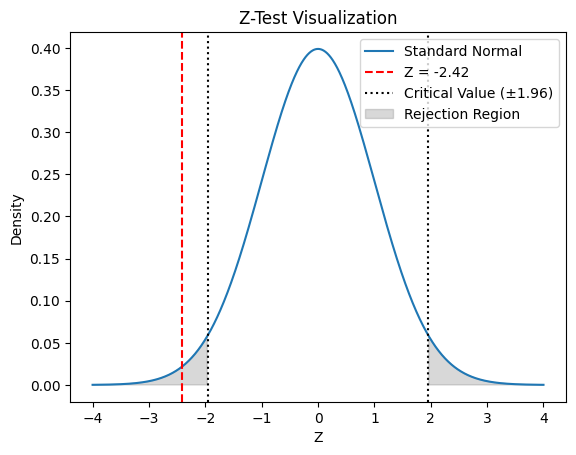

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

z_crit = norm.ppf(0.975)  # 95% confidence → 2.5% in each tail

plt.plot(x, y, label="Standard Normal")
plt.axvline(z, color="red", linestyle="--", label=f"Z = {z:.2f}")
plt.axvline(z_crit, color="black", linestyle=":", label="Critical Value (±1.96)")
plt.axvline(-z_crit, color="black", linestyle=":")

plt.fill_between(x, y, where=(x < -z_crit) | (x > z_crit), color='gray', alpha=0.3, label="Rejection Region")
plt.legend()
plt.title("Z-Test Visualization")
plt.xlabel("Z")
plt.ylabel("Density")
plt.show()


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([x1, x2])
nobs = np.array([n1, n2])

stat, pval = proportions_ztest(count, nobs)



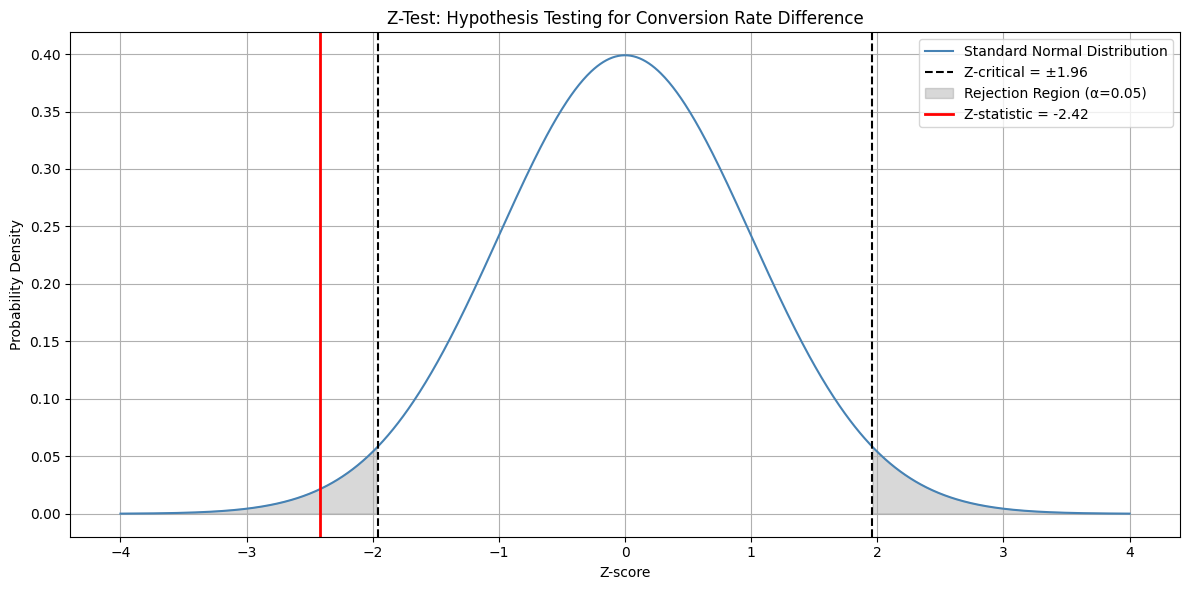

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create standard normal curve values
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Set up figure
plt.figure(figsize=(12, 6))

# Plot the normal distribution curve
plt.plot(x, y, label='Standard Normal Distribution', color='steelblue')

# Plot critical values for 95% CI
plt.axvline(z_crit, color='black', linestyle='--', label=f'Z-critical = ±{z_crit:.2f}')
plt.axvline(-z_crit, color='black', linestyle='--')

# Shade rejection regions
plt.fill_between(x, y, where=(x < -z_crit) | (x > z_crit), color='gray', alpha=0.3, label='Rejection Region (α=0.05)')

# Plot Z-statistic
plt.axvline(z, color='red', linestyle='-', linewidth=2, label=f'Z-statistic = {z:.2f}')

# Titles and labels
plt.title('Z-Test: Hypothesis Testing for Conversion Rate Difference')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


95% Confidence Interval for Difference (p2 - p1): (0.2270%, 2.1730%)


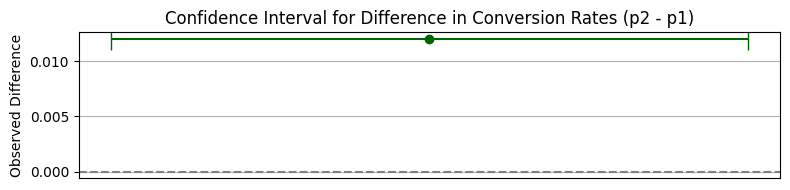

In [7]:
# CI for difference in p1 - p2 (without pooling)
diff = p2 - p1
se_diff = np.sqrt(p1*(1 - p1)/n1 + p2*(1 - p2)/n2)
z_star = norm.ppf(1 - alpha/2)  # for 95% CI
ci_lower = diff - z_star * se_diff
ci_upper = diff + z_star * se_diff

# Show values
print(f"95% Confidence Interval for Difference (p2 - p1): ({ci_lower:.4%}, {ci_upper:.4%})")

# Plot Confidence Interval
plt.figure(figsize=(8, 2))
plt.errorbar(x=0, y=diff, xerr=[[diff - ci_lower], [ci_upper - diff]],
             fmt='o', color='darkgreen', capsize=8)

plt.axhline(0, linestyle='--', color='gray')
plt.title("Confidence Interval for Difference in Conversion Rates (p2 - p1)")
plt.ylabel("Observed Difference")
plt.xticks([])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


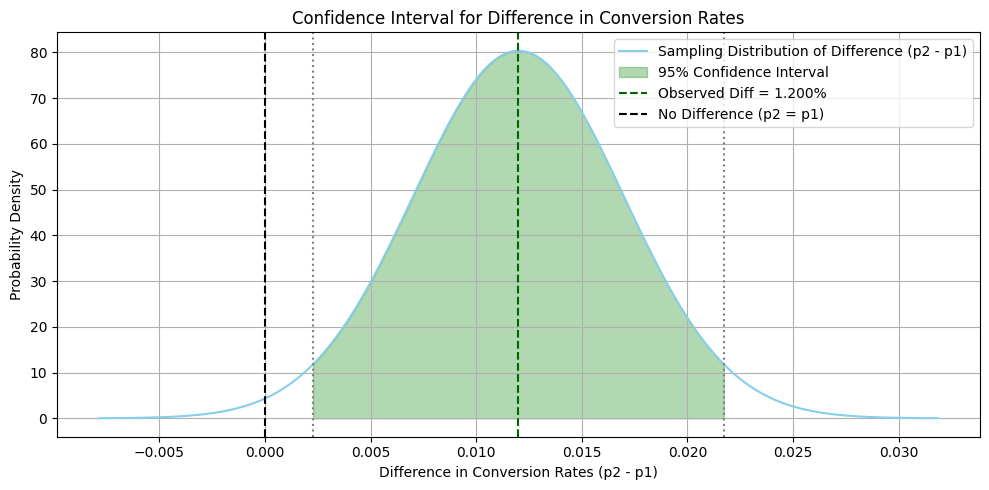

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Reuse from above:
diff = p2 - p1
se_diff = np.sqrt(p1*(1 - p1)/n1 + p2*(1 - p2)/n2)
z_star = norm.ppf(1 - alpha/2)
ci_lower = diff - z_star * se_diff
ci_upper = diff + z_star * se_diff

# Create x values around the observed diff (mean)
x = np.linspace(diff - 4*se_diff, diff + 4*se_diff, 1000)
y = norm.pdf(x, loc=diff, scale=se_diff)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sampling Distribution of Difference (p2 - p1)', color='skyblue')

# Fill CI region
plt.fill_between(x, y, where=(x >= ci_lower) & (x <= ci_upper), color='green', alpha=0.3, label='95% Confidence Interval')

# Add observed diff
plt.axvline(diff, color='darkgreen', linestyle='--', label=f'Observed Diff = {diff:.3%}')
# Add CI bounds
plt.axvline(ci_lower, color='gray', linestyle=':')
plt.axvline(ci_upper, color='gray', linestyle=':')

# Reference line at 0
plt.axvline(0, color='black', linestyle='--', label='No Difference (p2 = p1)')

plt.title("Confidence Interval for Difference in Conversion Rates")
plt.xlabel("Difference in Conversion Rates (p2 - p1)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


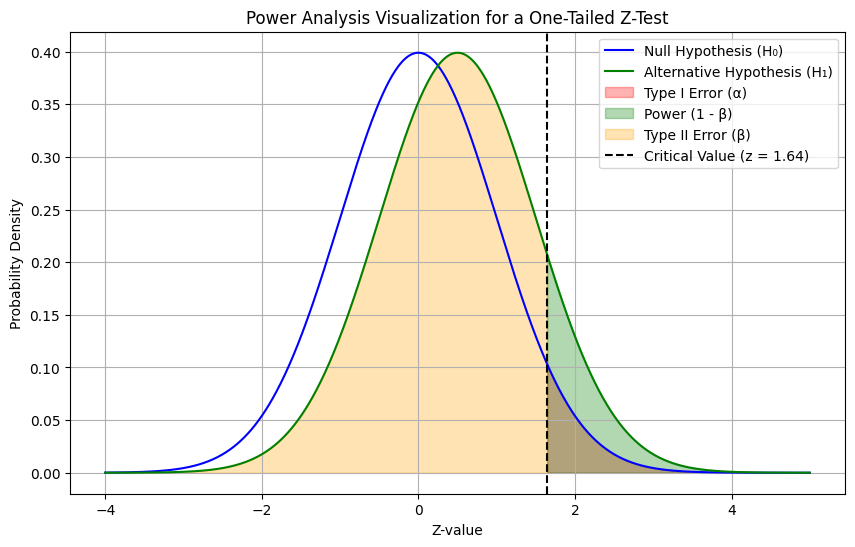

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
alpha = 0.05                    # Significance level
power = 0.8                     # Desired power
z_alpha = norm.ppf(1 - alpha)   # Critical value (one-tailed)
z_beta = norm.ppf(power)        # Used for effect size

# Effect size (difference in proportions, scaled)
effect_size = 0.5               # Cohen's h or standardized effect size
mu0 = 0                         # Mean under H0 (null)
mu1 = mu0 + effect_size         # Mean under H1 (alternative)
std = 1                         # Standard deviation

# Create x-axis values
x = np.linspace(-4, 5, 1000)

# Calculate PDFs
y0 = norm.pdf(x, mu0, std)  # H0 distribution
y1 = norm.pdf(x, mu1, std)  # H1 distribution

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y0, label='Null Hypothesis (H₀)', color='blue')
plt.plot(x, y1, label='Alternative Hypothesis (H₁)', color='green')

# Shade Type I Error (alpha)
x_alpha = np.linspace(z_alpha, 5, 300)
plt.fill_between(x_alpha, norm.pdf(x_alpha, mu0, std), color='red', alpha=0.3, label='Type I Error (α)')

# Shade Power (1 - β)
x_power = np.linspace(z_alpha, 5, 300)
plt.fill_between(x_power, norm.pdf(x_power, mu1, std), color='green', alpha=0.3, label='Power (1 - β)')

# Shade Type II Error (β)
x_beta_region = np.linspace(-4, z_alpha, 300)
plt.fill_between(x_beta_region, norm.pdf(x_beta_region, mu1, std), color='orange', alpha=0.3, label='Type II Error (β)')

# Labels and legend
plt.axvline(z_alpha, color='black', linestyle='--', label=f'Critical Value (z = {z_alpha:.2f})')
plt.title('Power Analysis Visualization for a One-Tailed Z-Test')
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [11]:
pip install --upgrade statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------ --------------------------- 2.9/9.6 MB 16.2 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 15.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np

def proportion_effectsize(p1, p2):
    """
    Calculates Cohen's h for two proportions.
    """
    return 2 * np.arcsin(np.sqrt(p1)) - 2 * np.arcsin(np.sqrt(p2))


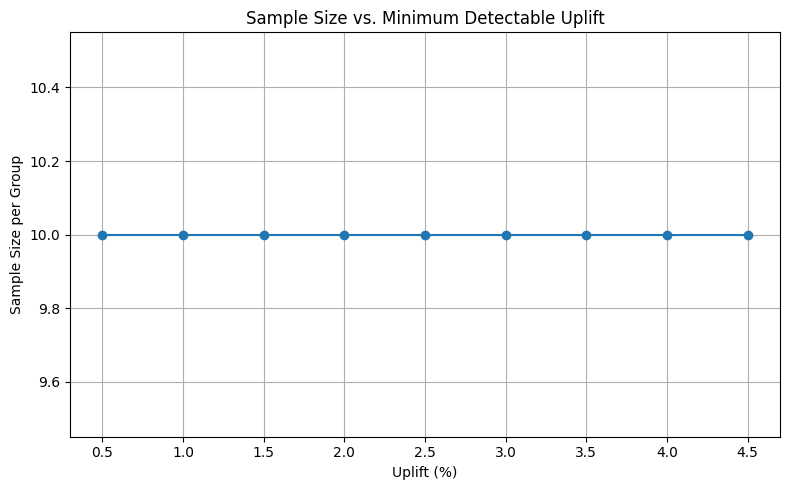

Example: Minimum sample size per group = 10 (for uplift ~0.5%)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
import warnings

# Inputs
p1 = 0.10
uplifts = np.arange(0.005, 0.05, 0.005)  # 0.5% to 5%
p2_values = p1 + uplifts
alpha = 0.05
power = 0.80

analysis = NormalIndPower()
sample_sizes = []

# Silence convergence warnings
warnings.filterwarnings("ignore")

for p2 in p2_values:
    try:
        eff_size = proportion_effectsize(p1, p2)
        n = analysis.solve_power(effect_size=eff_size, power=power, alpha=alpha, alternative='larger')
        sample_sizes.append(n)
    except Exception as e:
        sample_sizes.append(np.nan)  # Handle failed convergence gracefully

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(uplifts * 100, sample_sizes, marker='o')
plt.title("Sample Size vs. Minimum Detectable Uplift")
plt.xlabel("Uplift (%)")
plt.ylabel("Sample Size per Group")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print one example
valid_sizes = [s for s in sample_sizes if not np.isnan(s)]
if valid_sizes:
    example_size = valid_sizes[0]
    print(f"Example: Minimum sample size per group = {int(example_size)} (for uplift ~{uplifts[0]*100:.1f}%)")


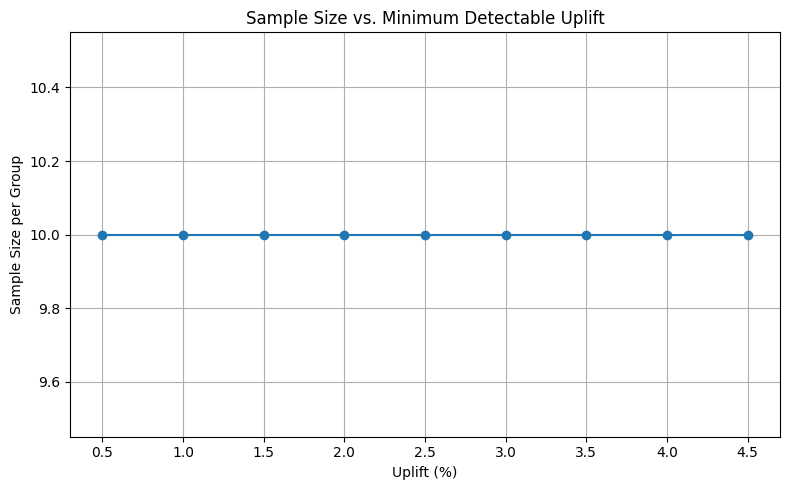

In [19]:
import matplotlib.pyplot as plt
import numpy as np

p1 = 0.10
uplifts = np.arange(0.005, 0.05, 0.005)
p2_values = p1 + uplifts
alpha = 0.05
power = 0.80

analysis = NormalIndPower()

sample_sizes = []
for p2 in p2_values:
    eff_size = proportion_effectsize(p1, p2)
    n = analysis.solve_power(effect_size=eff_size, power=power, alpha=alpha, alternative='larger')
    sample_sizes.append(n)

plt.figure(figsize=(8, 5))
plt.plot(uplifts * 100, sample_sizes, marker='o')
plt.title("Sample Size vs. Minimum Detectable Uplift")
plt.xlabel("Uplift (%)")
plt.ylabel("Sample Size per Group")
plt.grid(True)
plt.tight_layout()
plt.show()
